In [1]:
SLR <- "data{
	int N; 			//length of dataset
	vector[N] y;	//response observations
	vector[N] x;	//input observations
}
parameters{
	real beta0;
	real beta1;
	real<lower=0> sigma;
}
model{
	beta0 ~ uniform(-1,1);				//prior on beta0
	beta1 ~ uniform(-1,1);				//prior on beta1
	y ~ normal(beta0 + beta1*x, sigma);	//likelihood model
}
generated quantities{
	vector[N] y_pred;
//	vector[N] log_lik;

	for (i in 1:N)
		y_pred[i] = beta0 + beta1*x[i];
	// Marginal log likelihood
	//for (i in 1:N)
	//	log_lik[i] = normal_lpdf(y[i] | beta0 + beta1*x[i], sigma);
}"

In [2]:
library(rstan)
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.14.1, packaged: 2016-12-28 14:55:41 UTC, GitRev: 5fa1e80eb817)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())


In [3]:
mod_slr  <- stan_model('D:/Dropbox/Teaching/Bayes/DSI/code/simple_linear_regression.stan')

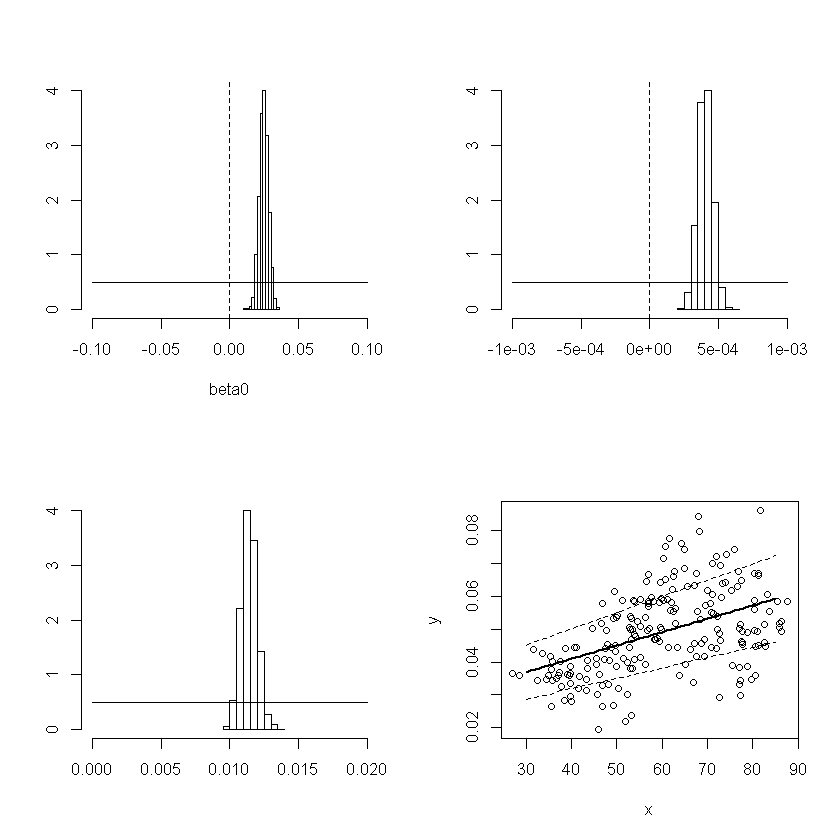

In [4]:
datmp  <- read.csv('D:/Dropbox/Teaching/Bayes/DSI/data/ozone_Riverside_epa.csv')
datmp  <- datmp[complete.cases(cbind(datmp$temp,datmp$Arithmetic.Mean)),]

stan_dat <- list(y=datmp$Arithmetic.Mean[1:200], x=datmp$temp[1:200], N=200)

fit <- sampling(mod_slr, data=stan_dat)
post <- extract(fit)


In [ ]:

########################################################
## Plots ###############################################
########################################################
par(mfrow=c(2,2))
plot(seq(-0.1,0.1,length.out=10), rep(0.5,10),type='l',ylim=c(0,4),ylab='',xlab='beta0',bty='n')
	par(new=TRUE); hist(post$beta0,xlim=c(-0.1,0.1),main='',xlab='',ylab='',xaxt='n',yaxt='n',bty='n')
	abline(v=0,lty=2)
plot(seq(-0.001,0.001,length.out=10), rep(0.5,10),type='l',ylim=c(0,4),bty='n',ylab='',xlab='')
	par(new=TRUE); hist(post$beta1,xlim=c(-0.001,0.001),main='',xlab='',ylab='',xaxt='n',yaxt='n',bty='n')
	abline(v=0,lty=2)
plot(seq(0,0.02,length.out=10), rep(0.5,10),type='l',ylim=c(0,4),bty='n',ylab='',xlab='')
	par(new=TRUE); hist(post$sigma,xlim=c(0,0.02),main='',xlab='',ylab='',xaxt='n',yaxt='n',bty='n')
plot(stan_dat$x, stan_dat$y,ylab='y',xlab='x')
lines(seq(30,85),quantile(post$beta0,0.05) + quantile(post$beta1,0.05)*seq(30,85),lty=2)
lines(seq(30,85),quantile(post$beta0,0.50) + quantile(post$beta1,0.50)*seq(30,85),lwd=2)
lines(seq(30,85),quantile(post$beta0,0.95) + quantile(post$beta1,0.95)*seq(30,85),lty=2)